# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

>Develop a predictive model that uses historical data on used car transactions to identify and quantify the impact of various attributes (such as make, model, year, mileage, condition, etc.) on the price of used cars. This involves assessing data quality, preparing the data, selecting and applying appropriate modeling techniques, and evaluating model performance to ensure that the key drivers identified are reliable and can inform pricing strategies effectively.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

>Some things to consider are:
> 1. Initial Data Collection and Loading: Load the dataset to get an overview of its structure, including the number of rows (entries) and columns (features).
> 2. Descriptive Statistics: Generate basic statistics to understand the distribution of data, identify potential outliers, and get a sense of data scales and types.
> 3. Data Quality Assessment: Check for missing values, duplicate entries, and inconsistencies in the data, such as illogical values (e.g., negative car mileage).
> 4. Exploratory Data Analysis (EDA): Use visualizations to understand relationships between variables, especially how different features might relate to used car prices.
> 5. Data Type Check: Ensure that each column is of the correct data type for further analysis (e.g., categorical variables are recognized as such).<br>&nbsp;

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Load the data
vehicles = pd.read_csv('data/vehicles.csv')
vehicles.head()



,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [16]:
import pandas as pd

# Step 1: Load your CSV file into a DataFrame
df = pd.read_csv('data/vehicles.csv')  # Replace 'path_to_your_file.csv' with your actual file path

# Step 2: Drop rows with any missing values
cleaned_df = df.dropna()

# Step 3: Save the cleaned DataFrame to a new CSV file
cleaned_df.to_csv('data/vehicles-no-na.csv', index=False)  # 'index=False' ensures that pandas doesn't write row indices into the CSV file


In [2]:
# Step 2: Descriptive statistics
print(vehicles.describe(include='all'))
print("\nData types:\n", vehicles.dtypes)

                  id    region         price           year manufacturer  \
count   4.268800e+05    426880  4.268800e+05  425675.000000       409234   
unique           NaN       404           NaN            NaN           42   
top              NaN  columbus           NaN            NaN         ford   
freq             NaN      3608           NaN            NaN        70985   
mean    7.311487e+09       NaN  7.519903e+04    2011.235191          NaN   
std     4.473170e+06       NaN  1.218228e+07       9.452120          NaN   
min     7.207408e+09       NaN  0.000000e+00    1900.000000          NaN   
25%     7.308143e+09       NaN  5.900000e+03    2008.000000          NaN   
50%     7.312621e+09       NaN  1.395000e+04    2013.000000          NaN   
75%     7.315254e+09       NaN  2.648575e+04    2017.000000          NaN   
max     7.317101e+09       NaN  3.736929e+09    2022.000000          NaN   

         model condition    cylinders    fuel      odometer title_status  \
count   421

In [3]:
import matplotlib.pyplot as plt

# Step 3: Data Quality Assessment
# Checking for missing values
print("\nMissing values:\n", vehicles.isnull().sum())



Missing values:
 id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [4]:
# Calculate the percentage of rows with any missing values
percentage_missing = vehicles.isnull().any(axis=1).mean() * 100

print(f"Percentage of rows with any missing values: {percentage_missing:.2f}%")

Percentage of rows with any missing values: 91.83%


In [5]:
# Checking for duplicates
print("\nNumber of duplicate rows:", vehicles.duplicated().sum())



Number of duplicate rows: 0


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Handling Missing Values

In [6]:
# For categorical data, fill missing values with 'Unknown'
categorical_columns = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
essential_columns = ['manufacturer', 'model', 'condition', 'odometer']
removable_columns = [column for column in categorical_columns if column not in essential_columns]

for column in categorical_columns:
    vehicles[column].fillna('Unknown', inplace=True)

# For 'year' and 'odometer', fill missing values with the median of their respective columns
vehicles['year'].fillna(vehicles['year'].median(), inplace=True)
vehicles['odometer'].fillna(vehicles['odometer'].median(), inplace=True)

# Although 'VIN' encodes the manufacturer, year, make and model, and the trim level including unique features and specifications, I'm dropping it here because it's not useful for analysis in encoded form
vehicles.drop('VIN', axis=1, inplace=True)


#### Outlier Handling

In [7]:
original_size = len(vehicles)

# Remove outliers with generous multiplier of interquartile range
for column in ['price', 'odometer']:
    Q1 = vehicles[column].quantile(0.25)
    Q3 = vehicles[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = 0
    upper_bound = Q3 + 2 * IQR
    vehicles = vehicles[(vehicles[column] >= lower_bound) & (vehicles[column] <= upper_bound)]

new_size = len(vehicles)
percentage_removed = ((original_size - new_size) / original_size) * 100
print(f"Percentage of the dataset removed: {percentage_removed:.2f}%")

Percentage of the dataset removed: 1.56%


#### Feature Engineering

In [8]:
# Max year is 2022
vehicles['vehicle_age'] = 2022 - vehicles['year']
vehicles.drop('year', axis=1, inplace=True)  # Dropping the 'year' column as 'vehicle_age' is more relevant

#### Scaling Numerical Features

In [9]:
from sklearn.preprocessing import StandardScaler

# Scaling 'odometer' and 'vehicle_age'
scaler = StandardScaler()
vehicles[['odometer', 'vehicle_age']] = scaler.fit_transform(vehicles[['odometer', 'vehicle_age']])


#### Transforming Skewed Data

In [10]:
# Applying log transformation to 'price' to handle skewness
vehicles['price'] = np.log1p(vehicles['price'])

#### Encoding Categorical Variables

In [11]:
# vehicles = pd.get_dummies(vehicles, columns=categorical_columns)
vehicles = pd.get_dummies(vehicles, columns=['manufacturer', 'model', 'condition'])
vehicles.drop(removable_columns, axis=1, inplace=True)

#### Splitting the Data

In [12]:
X = vehicles.drop('price', axis=1)
y = vehicles['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
print(X_train.shape)
print(X_train.dtypes)
print(y_train.shape)
print(y_train.dtypes)

(336187, 28771)
id                        int64
odometer                float64
vehicle_age             float64
manufacturer_Unknown       bool
manufacturer_acura         bool
                         ...   
condition_fair             bool
condition_good             bool
condition_like new         bool
condition_new              bool
condition_salvage          bool
Length: 28771, dtype: object
(336187,)
float64


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

file_path = 'data/vehicles-no-na.csv'
data = pd.read_csv(file_path)

# Data Preparation
# Drop irrelevant features and limit the 'model' categories
data_prepared = data.drop(['id', 'VIN', 'region', 'state'], axis=1)
top_models = data_prepared['model'].value_counts().nlargest(100).index
data_prepared['model'] = data_prepared['model'].where(data_prepared['model'].isin(top_models), 'other')

# Apply one-hot encoding with sparse matrices
categorical_columns = data_prepared.select_dtypes(include=['object']).columns
column_transformer_sparse = ColumnTransformer([
    ("one_hot", OneHotEncoder(sparse=True, handle_unknown='ignore'), categorical_columns)
], remainder='passthrough')
data_transformed_sparse = column_transformer_sparse.fit_transform(data_prepared)

# Extract price and odometer for outlier detection and removal
price = data_prepared['price'].values
odometer = data_prepared['odometer'].values

def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    return (data < 0) | (data > Q3 + outlier_step)

outliers_price = detect_outliers(price)
outliers_odometer = detect_outliers(odometer)
outliers = outliers_price | outliers_odometer
data_transformed_clean = data_transformed_sparse[~outliers]
price_clean = price[~outliers]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_transformed_clean, price_clean, test_size=0.2, random_state=42)

# Initialize and train the models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict and evaluate the models
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Linear Regression MSE:", mse_linear)
print("Ridge Regression MSE:", mse_ridge)
print("Lasso Regression MSE:", mse_lasso)


e:\Users\drmartell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Linear Regression MSE: 6.446716720141209e-07
Ridge Regression MSE: 6.446717368659554e-07
Lasso Regression MSE: 8.130016942170184e-05


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

file_path = 'data/vehicles-no-na.csv'
data = pd.read_csv(file_path)

# Prepare the data by dropping irrelevant features and limiting 'model' categories
data_prepared = data.drop(['id', 'VIN', 'region', 'state', 'price'], axis=1)  # Exclude 'price' from features
top_models = data_prepared['model'].value_counts().nlargest(100).index
data_prepared['model'] = data_prepared['model'].where(data_prepared['model'].isin(top_models), 'other')

# Categorical columns excluding 'price'
categorical_columns = data_prepared.select_dtypes(include=['object']).columns

# Apply one-hot encoding with sparse matrices to features excluding 'price'
column_transformer_sparse = ColumnTransformer([
    ("one_hot", OneHotEncoder(sparse_output=True, handle_unknown='ignore'), categorical_columns)
], remainder='passthrough')
data_transformed_sparse = column_transformer_sparse.fit_transform(data_prepared)

# Extract 'odometer' for outlier detection and removal
odometer = data_prepared['odometer'].values

# Function to detect outliers
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    return (data < 0) | (data > Q3 + outlier_step)

# Detect and remove outliers based on 'odometer'
outliers_odometer = detect_outliers(odometer)
data_transformed_clean = data_transformed_sparse[~outliers_odometer]
price_clean = data['price'].values[~outliers_odometer]  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_transformed_clean, price_clean, test_size=0.2, random_state=42)

# Train the Lasso regression model only
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)

# Extract feature names from the ColumnTransformer
feature_names = column_transformer_sparse.named_transformers_['one_hot'].get_feature_names_out(categorical_columns)
feature_names = np.concatenate([feature_names, data_prepared.columns.drop(categorical_columns)])

# Extract Lasso coefficients
lasso_coefficients = lasso_model.coef_

# Map coefficients to feature names
feature_contributions = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

# Display non-zero coefficients for features contributing to the model
non_zero_features = feature_contributions[feature_contributions['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)
print(non_zero_features)


Lasso Regression MSE: 89245282.72411992
                       Feature   Coefficient
11        manufacturer_ferrari  64576.217948
2    manufacturer_aston-martin  29790.122680
37          manufacturer_tesla  20236.495533
32        manufacturer_porsche  15484.120960
120     model_silverado 3500hd  11169.271901
..                         ...           ...
108               model_ranger  -6702.439424
41                  model_1500  -6838.256422
60              model_colorado  -7058.151467
83              model_f-250 sd  -9241.661014
169         transmission_other -11310.774532

[175 rows x 2 columns]


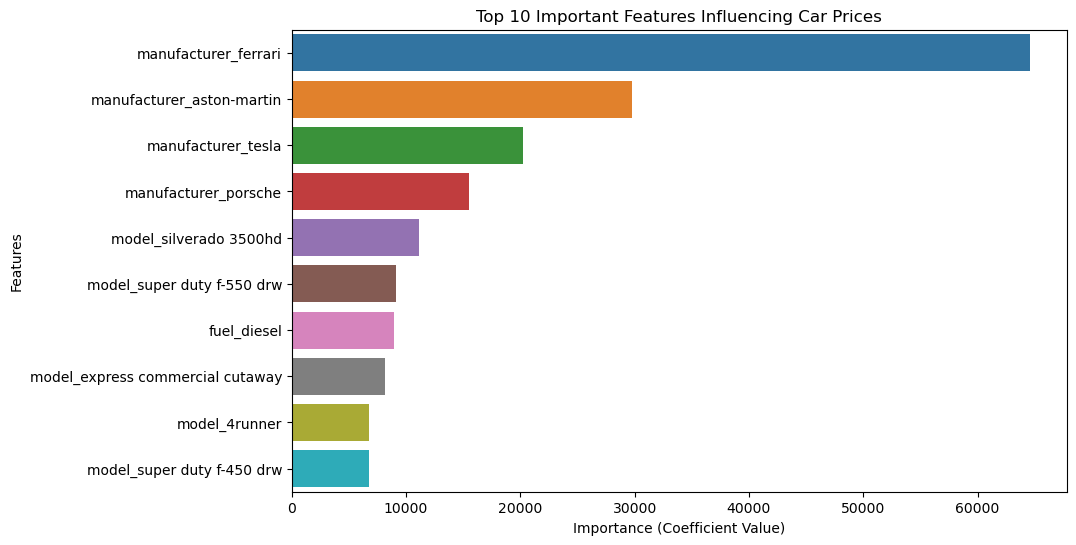

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 10
top_features = non_zero_features.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_features, orient='h')
plt.title('Top 10 Important Features Influencing Car Prices')
plt.xlabel('Importance (Coefficient Value)')
plt.ylabel('Features')
plt.savefig('images/important_features.png', dpi=300, bbox_inches='tight')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Modeling without sparse data approaches proved too memory intensive. Since there's no reason why dealers couldn't collect complete data on vehicles going forward, I chose to make use of a subset of the provided data that did not have any missing values. These combined approaches allowed for model training to complete.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

We were able to generate a pricing approach based on the data provided.
Although it isn't highly precise, it can help create estimated prices to within +/- $10K.

As may not be too surprising, when looking at the most influencial factors we see things like luxury brands, and atypical vehicles.

![Top Ten Determinants of Vehicle Price](images/important_features.png)

With continued additions to this dataset, it's accuracy can be expected to improve over time.
